<a href="https://colab.research.google.com/github/avinash-marsdevs/infra-diagrams-workaround/blob/main/Afto_azure_infra_diagrams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!apt-get install graphviz
!pip install graphviz
!pip install diagrams

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.1/25.1 MB 64.6 MB/s eta 0:00:00


In [10]:
from diagrams import Diagram, Cluster
from diagrams.azure.compute import ContainerApps
from diagrams.azure.compute import ContainerRegistries
from diagrams.azure.identity import ActiveDirectory, IdentityGovernance, ManagedIdentities
from diagrams.azure.security import KeyVaults
from diagrams.azure.network import FrontDoors, VirtualNetworks, TrafficManagerProfiles, LoadBalancers
from diagrams.azure.monitor import Monitor
from diagrams.azure.devops import ApplicationInsights
from diagrams.azure.analytics import LogAnalyticsWorkspaces
from diagrams.azure.devops import Devops
from diagrams.azure.network import Firewall
from diagrams.azure.general import Managementgroups as ManagementGroups
from diagrams.custom import Custom
from diagrams.onprem.client import Users
from diagrams.onprem.container import Docker
from diagrams.onprem.ci import GithubActions
from diagrams.azure.database import DatabaseForPostgresqlServers

# Generate Diagram
with Diagram("Afto Production Architecture", direction="LR", outformat="png", show=False):

    # Define the user accessing the application
    user = Users("Canadian User\n(Web Browser)")

    with Cluster("Frontend Development Environment"):
        # Define the Docker container representing the containerized app
        dockerized_frontend = Docker("Development\nDockerized\nFrontend")

    with Cluster("Backend Development Environment"):
        # Define backend development environment
        backend_source_code = Docker("Development\nNode.js + Express Source")

    with Cluster("Frontend CI/CD Pipeline"):
        frontend_ci_cd_pipeline = GithubActions("Frontend GitHub Actions\nWorkflow")
        frontend_key_vault = KeyVaults("Frontend Azure\nSecrets Key Vault")
        frontend_acr = ContainerRegistries("Frontend Azure Container\nRegistry")

    with Cluster("Backend CI/CD Pipeline"):
        backend_ci_cd_pipeline = GithubActions("Backend GitHub Actions\nWorkflow")
        backend_key_vault = KeyVaults("Backend Azure\nSecrets Key Vault")
        backend_acr = ContainerRegistries("Backend Azure Container\nRegistry")

    with Cluster("Azure Cloud Resources (Canada Central)"):
        # Define Azure resources
        frontend_container_apps = ContainerApps("Production\nFrontend Apps")
        azure_ad_authentication = ActiveDirectory("Azure AD\nAuthentication")
        frontend_managed_identity = ManagedIdentities("Frontend Managed Identity")
        front_door_service = FrontDoors("Azure\nFront Door")
        traffic_manager = TrafficManagerProfiles("Azure Traffic Manager\n(Remove Traffic Manager\nif single-region)")
        virtual_network_service = VirtualNetworks("Azure\nVirtual Network")
        firewall = Firewall("Azure Firewall")
        backend_container_apps = ContainerApps("Production\nBackend Apps")
        backend_managed_identity = ManagedIdentities("Backend Managed Identity")
        backend_load_balancer = LoadBalancers("Azure Load Balancer\nBackend")
        managed_database = DatabaseForPostgresqlServers("Managed PostgreSQL\nDatabase")

    with Cluster("Monitoring Services"):
        monitoring_service = Monitor("Azure\nMonitoring")
        application_insights_frontend = ApplicationInsights("Application Insights Frontend")
        application_insights_backend = ApplicationInsights("Application Insights Backend")

    with Cluster("Logging Services"):
        log_analytics_workspace = LogAnalyticsWorkspaces("Azure Log Analytics Workspace")

    with Cluster("Governance and Compliance"):
        azure_policy = IdentityGovernance("Azure Governance")
        management_group = ManagementGroups("Management Groups")

    # Define connections and flow
    user >> front_door_service >> traffic_manager >> frontend_container_apps  # User interacts via Azure Front Door, Traffic Manager, and Azure Container Apps
    frontend_container_apps >> azure_ad_authentication  # Optional authentication layer via Azure AD
    frontend_container_apps >> frontend_managed_identity  # Frontend uses Managed Identity
    frontend_container_apps >> backend_container_apps  # Frontend connects to Backend
    backend_container_apps >> backend_managed_identity  # Backend uses Managed Identity
    backend_container_apps >> backend_load_balancer  # Backend traffic managed by Load Balancer
    backend_load_balancer >> managed_database  # Backend interacts with the PostgreSQL database
    backend_container_apps >> log_analytics_workspace  # Backend logs sent to Log Analytics Workspace
    frontend_container_apps >> monitoring_service  # Frontend sends metrics to Azure Monitor
    frontend_container_apps >> application_insights_frontend  # Application Insights for Frontend
    backend_container_apps >> application_insights_backend  # Application Insights for Backend

    dockerized_frontend >> frontend_ci_cd_pipeline  # Flow from source code to frontend pipeline
    frontend_ci_cd_pipeline >> frontend_key_vault  # Frontend pipeline accesses secrets for deployment
    frontend_ci_cd_pipeline >> frontend_acr  # Frontend GitHub Actions pushes to Frontend ACR
    frontend_acr >> frontend_container_apps  # Frontend ACR deploys to Azure Container Apps

    backend_source_code >> backend_ci_cd_pipeline  # Flow from backend source code to backend pipeline
    backend_ci_cd_pipeline >> backend_key_vault  # Backend pipeline accesses secrets for deployment
    backend_ci_cd_pipeline >> backend_acr  # Backend GitHub Actions pushes to Backend ACR
    backend_acr >> backend_container_apps  # Backend ACR deploys to Azure Container Apps

    monitoring_service >> log_analytics_workspace  # Metrics connected to Logging Services
    firewall >> virtual_network_service  # Firewall secures the virtual network
    azure_policy >> management_group  # Policy applied to management group


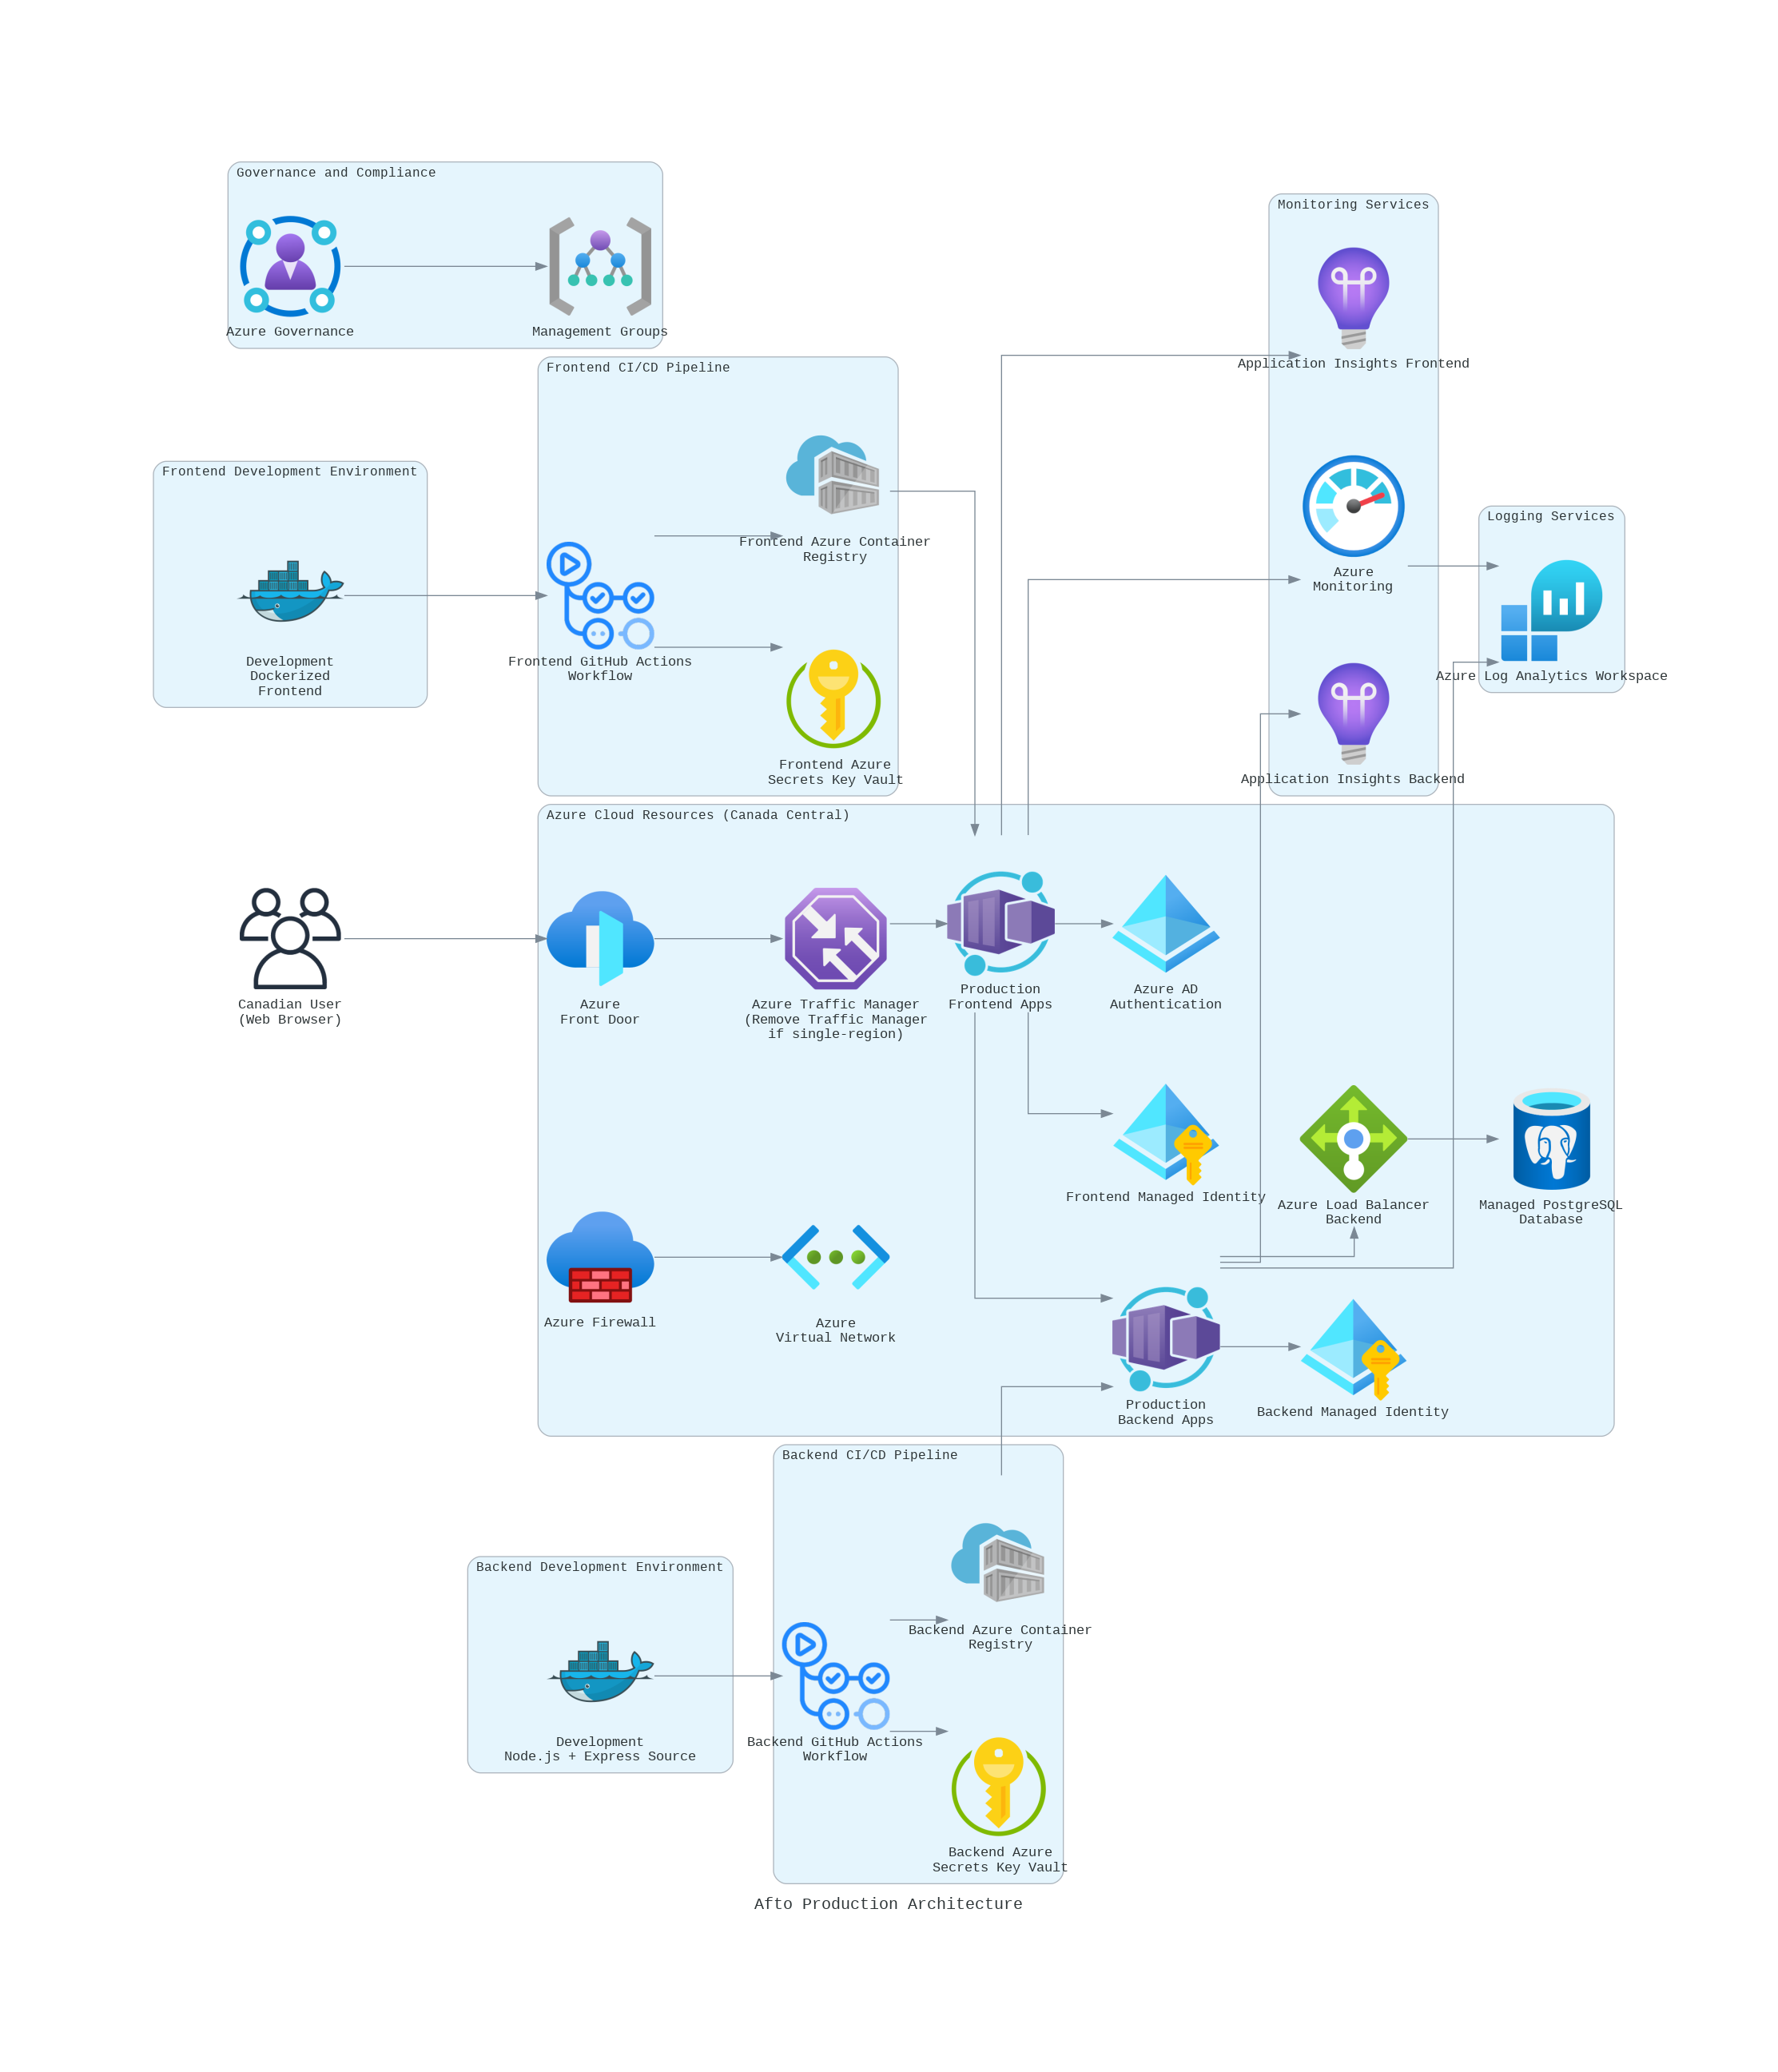

In [11]:
from IPython.display import Image
Image(filename='afto_production_architecture.png')
